# **Web Scrapping of News Articles of reliance Stocks**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

def scrape_news(query, start_date, end_date):
    articles = []
    url = f"https://news.google.com/rss/search?q={query}+after:{start_date}+before:{end_date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')
    
    for item in items:
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text
        articles.append({'title': title, 'link': link, 'pub_date': pub_date})
    return pd.DataFrame(articles)

# Define the date range and query
start_date = '2021-01-01'
end_date = '2023-12-31'
query = "Reliance stocks"

# Convert start and end dates to datetime objects
start_date_dt = datetime.datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')

# Initialize an empty DataFrame to store all articles
all_articles = pd.DataFrame()

# Loop through each month in the date range
current_date = start_date_dt
while current_date < end_date_dt:
    # Define the next month's start date
    next_date = current_date + datetime.timedelta(days=30)
    
    # Format dates to strings
    start_str = current_date.strftime('%Y-%m-%d')
    end_str = next_date.strftime('%Y-%m-%d')
    
    # Scrape news for the current month
    month_articles = scrape_news(query, start_str, end_str)
    
    # Append month articles to the all_articles DataFrame
    all_articles = pd.concat([all_articles, month_articles], ignore_index=True)
    
    # Move to the next month
    current_date = next_date

# Save all articles to a CSV file
all_articles.to_csv('reliance_news.csv', index=False)


In [2]:
news_df = pd.read_csv('reliance_news.csv')
news_df.head()

,title,link,pub_date
0,"Reliance Ind, SBI Life, IRCTC: Here are the to...",https://news.google.com/rss/articles/CBMiiwFod...,"Fri, 01 Jan 2021 08:00:00 GMT"
1,"Stocks To Watch: Reliance Industries, Bajaj Fi...",https://news.google.com/rss/articles/CBMiggFod...,"Thu, 21 Jan 2021 08:00:00 GMT"
2,Sensex at 50000: Six stocks that have been par...,https://news.google.com/rss/articles/CBMilgFod...,"Thu, 21 Jan 2021 08:00:00 GMT"
3,Karnataka farmers sell paddy to Reliance Retai...,https://news.google.com/rss/articles/CBMicWh0d...,"Mon, 11 Jan 2021 08:00:00 GMT"
4,"Sensex tanks over 500 points, Nifty ends below...",https://news.google.com/rss/articles/CBMieWh0d...,"Mon, 25 Jan 2021 08:00:00 GMT"


In [3]:
news_df['link'][0]

'https://news.google.com/rss/articles/CBMiiwFodHRwczovL3d3dy5idXNpbmVzcy1zdGFuZGFyZC5jb20vcG9kY2FzdC9tYXJrZXRzL3JlbGlhbmNlLWluZC1zYmktbGlmZS1pcmN0Yy1oZXJlLWFyZS10aGUtdG9wLXN0b2Nrcy10by1pbnZlc3QtaW4tMjAyMS0xMjEwMTAxMDA5NjFfMS5odG1s0gGPAWh0dHBzOi8vd3d3LmJ1c2luZXNzLXN0YW5kYXJkLmNvbS9hbXAvcG9kY2FzdC9tYXJrZXRzL3JlbGlhbmNlLWluZC1zYmktbGlmZS1pcmN0Yy1oZXJlLWFyZS10aGUtdG9wLXN0b2Nrcy10by1pbnZlc3QtaW4tMjAyMS0xMjEwMTAxMDA5NjFfMS5odG1s?oc=5'

# **Applying NLP for pre processing of news text**

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

news_df['cleaned_text'] = news_df['title'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
news_df.head()

,title,link,pub_date,cleaned_text
0,"Reliance Ind, SBI Life, IRCTC: Here are the to...",https://news.google.com/rss/articles/CBMiiwFod...,"Fri, 01 Jan 2021 08:00:00 GMT",reliance ind sbi life irctc top stocks invest ...
1,"Stocks To Watch: Reliance Industries, Bajaj Fi...",https://news.google.com/rss/articles/CBMiggFod...,"Thu, 21 Jan 2021 08:00:00 GMT",stocks watch reliance industries bajaj finance...
2,Sensex at 50000: Six stocks that have been par...,https://news.google.com/rss/articles/CBMilgFod...,"Thu, 21 Jan 2021 08:00:00 GMT",sensex 50000 six stocks part index dream run b...
3,Karnataka farmers sell paddy to Reliance Retai...,https://news.google.com/rss/articles/CBMicWh0d...,"Mon, 11 Jan 2021 08:00:00 GMT",karnataka farmers sell paddy reliance retail m...
4,"Sensex tanks over 500 points, Nifty ends below...",https://news.google.com/rss/articles/CBMieWh0d...,"Mon, 25 Jan 2021 08:00:00 GMT",sensex tanks 500 points nifty ends 14 250 auto...


# **Extracting the details of Reliance's stock price from 1st jan 2021 to 31st Dec 2023**

In [8]:
import yfinance as yf

reliance_stock = yf.download('RELIANCE.NS', start=start_date, end=end_date)
reliance_stock.reset_index(inplace=True)
reliance_stock.to_csv('reliance_stock_prices.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


In [9]:
stock_df = pd.read_csv('reliance_stock_prices.csv')
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,1834.923340,1843.230347,1829.385376,1834.461914,1815.729614,5007587
1,2021-01-04,1841.476685,1844.984009,1816.463379,1837.553955,1818.790039,12256767
2,2021-01-05,1817.386353,1830.862183,1805.387329,1814.709717,1796.179077,12061545
3,2021-01-06,1814.525024,1814.617310,1758.452881,1766.852173,1748.810181,23200734
4,2021-01-07,1772.620850,1795.234375,1758.452881,1763.990845,1745.978027,16162959


# **Sentiment Analysis**

In [10]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df['sentiment'] = news_df['cleaned_text'].apply(get_sentiment)

# **Merge all csv files into final one**

In [11]:
news_df['pub_date'] = pd.to_datetime(news_df['pub_date']).dt.date

stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

# Merge data on the date
merged_df = pd.merge(news_df, stock_df, left_on='pub_date', right_on='Date', how='inner')

# Check if merged_df is empty
if merged_df.empty:
    print("The merged DataFrame is empty. Please check the date ranges and formats.")
else:
    merged_df.to_csv('merged_data.csv', index=False)
    print(merged_df.head())


                                               title  \
0  Reliance Ind, SBI Life, IRCTC: Here are the to...   
1  Stocks To Watch: Reliance Industries, Bajaj Fi...   
2  Sensex at 50000: Six stocks that have been par...   
3  Karnataka farmers sell paddy to Reliance Retai...   
4  Sensex tanks over 500 points, Nifty ends below...   

                                                link    pub_date  \
0  https://news.google.com/rss/articles/CBMiiwFod...  2021-01-01   
1  https://news.google.com/rss/articles/CBMiggFod...  2021-01-21   
2  https://news.google.com/rss/articles/CBMilgFod...  2021-01-21   
3  https://news.google.com/rss/articles/CBMicWh0d...  2021-01-11   
4  https://news.google.com/rss/articles/CBMieWh0d...  2021-01-25   

                                        cleaned_text  sentiment        Date  \
0  reliance ind sbi life irctc top stocks invest ...       0.25  2021-01-01   
1  stocks watch reliance industries bajaj finance...       0.00  2021-01-21   
2  sensex 50000 s

In [12]:
news_df.sample(10)

,title,link,pub_date,cleaned_text,sentiment
1019,JK Paper jumps 4% on acquiring majority stake ...,https://news.google.com/rss/articles/CBMijAFod...,2022-11-22,jk paper jumps 4 acquiring majority stake hori...,0.000000
825,Mukesh Ambani hands over Reliance Jio reins to...,https://news.google.com/rss/articles/CBMipwFod...,2022-06-28,mukesh ambani hands reliance jio reins son aka...,0.000000
1614,Reliance share price Today Live Updates : Reli...,https://news.google.com/rss/articles/CBMibGh0d...,2023-08-23,reliance share price today live updates relian...,0.018182
792,Reopening 'Future' stores a work in progress f...,https://news.google.com/rss/articles/CBMihgFod...,2022-06-08,reopening future stores work progress reliance...,0.000000
37,Meet the 105-year-old who got Padma Shri for o...,https://news.google.com/rss/articles/CBMihAFod...,2021-01-27,meet 105 year old got padma shri organic farmi...,0.100000
260,What's Driving the Rally in Reliance Shares? -...,https://news.google.com/rss/articles/CBMicGh0d...,2021-06-01,driving rally reliance shares equitymaster,0.000000
1122,How to survive a bear attack — lessons for Ada...,https://news.google.com/rss/articles/CBMifGh0d...,2023-01-28,survive bear attack lessons adani ambani stock...,0.000000
662,5 countries with no airports - Vatican City - ...,https://news.google.com/rss/articles/CBMieGh0d...,2022-03-25,5 countries airports vatican city indiatimes,0.000000
1229,Reliance Industries to announce Q4 results on ...,https://news.google.com/rss/articles/CBMigwFod...,2023-04-14,reliance industries announce q4 results april ...,0.000000
1203,"Sensex tops 58,000, Nifty ends 120 pts higher;...",https://news.google.com/rss/articles/CBMiigFod...,2023-03-21,sensex tops 58 000 nifty ends 120 pts higher b...,0.250000


In [13]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2062 non-null   object 
 1   link          2062 non-null   object 
 2   pub_date      2062 non-null   object 
 3   cleaned_text  2062 non-null   object 
 4   sentiment     2062 non-null   float64
dtypes: float64(1), object(4)
memory usage: 80.7+ KB


In [14]:
stock_df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
502,2023-01-10,2405.337158,2405.337158,2349.957275,2361.402344,2353.090088,4023571
496,2023-01-02,2353.649170,2380.416260,2351.987793,2377.554932,2369.185791,2658087
703,2023-11-03,2327.199951,2334.949951,2315.750000,2319.699951,2319.699951,4425078
432,2022-09-29,2178.279297,2185.201660,2134.898193,2146.251221,2138.696289,7335913
574,2023-04-28,2198.585205,2237.259033,2198.354492,2234.120605,2226.256592,7782605
733,2023-12-19,2555.000000,2573.899902,2525.199951,2558.100098,2558.100098,8410302
187,2021-10-05,2358.356445,2410.875244,2351.203125,2408.290771,2392.009033,6766817
137,2021-07-23,1970.096680,1970.096680,1940.191406,1943.560425,1930.420532,4968515
98,2021-05-28,1836.769409,1942.914307,1836.769409,1933.499756,1913.756104,28234965
533,2023-02-23,2194.893311,2210.353516,2179.525391,2185.201660,2177.509766,4925955


In [15]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       741 non-null    object 
 1   Open       741 non-null    float64
 2   High       741 non-null    float64
 3   Low        741 non-null    float64
 4   Close      741 non-null    float64
 5   Adj Close  741 non-null    float64
 6   Volume     741 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.7+ KB


In [16]:
merged_df.sample(10)

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
1098,RIL Q4 Results: 8 major takeaways for Dalal St...,https://news.google.com/rss/articles/CBMiqgFod...,2023-04-21,ril q4 results 8 major takeaways dalal street ...,0.13125,2023-04-21,2169.649170,2179.202148,2156.496338,2168.126221,2160.494385,3823658
1637,"Reliance raises Rs 20,000 cr at 7.79% interest...",https://news.google.com/rss/articles/CBMie2h0d...,2023-11-10,reliance raises rs 20 000 cr 7 79 interest rat...,0.00000,2023-11-10,2305.550049,2316.350098,2298.050049,2314.899902,2314.899902,3867477
625,Reliance Industries to announce Q4 results tom...,https://news.google.com/rss/articles/CBMikwFod...,2022-05-05,reliance industries announce q4 results tomorr...,0.00000,2022-05-05,2513.789551,2519.789062,2429.335205,2437.549805,2421.070312,8605334
68,Myanmar or Burma: What's in a name? - What's t...,https://news.google.com/rss/articles/CBMiigFod...,2021-02-05,myanmar burma name country called indiatimes,0.00000,2021-02-05,1781.435547,1794.911377,1772.159424,1775.620605,1757.489136,10124023
202,ADAG Group shares hit upper circuit as promote...,https://news.google.com/rss/articles/CBMijgFod...,2021-06-14,adag group shares hit upper circuit promoter e...,0.00000,2021-06-14,2044.444336,2084.364014,2026.030396,2072.041992,2058.033691,10166218
1652,Reliance Jio Q2 Results: Net profit rises 4% Q...,https://news.google.com/rss/articles/CBMijgFod...,2023-10-27,reliance jio q2 results net profit rises 4 qoq...,0.00000,2023-10-27,2240.000000,2273.500000,2235.949951,2265.800049,2265.800049,5885542
715,"Markets snap 6-day rally; Sensex ends lower, N...",https://news.google.com/rss/articles/CBMiigFod...,2022-07-25,markets snap 6 day rally sensex ends lower nif...,0.00000,2022-07-25,2277.455566,2277.455566,2217.968262,2234.028320,2218.924805,11555226
1159,"Sensex ends above 60,600, Nifty tops 17,900; R...",https://news.google.com/rss/articles/CBMihwFod...,2023-04-27,sensex ends 60 600 nifty tops 17 900 realty me...,0.00000,2023-04-27,2192.124268,2200.431152,2181.971191,2194.016357,2186.293457,4583562
1686,"RIL, Infosys, TCS, ICICI, HDFC Bank: 5 stocks ...",https://news.google.com/rss/articles/CBMioQFod...,2023-11-29,ril infosys tcs icici hdfc bank 5 stocks may s...,0.00000,2023-11-29,2408.000000,2411.949951,2398.050049,2400.699951,2400.699951,6265653
707,Why one stock brokerage is bullish on Reliance...,https://news.google.com/rss/articles/CBMiamh0d...,2022-06-28,one stock brokerage bullish reliance industrie...,0.00000,2022-06-28,2290.977539,2338.834961,2290.977539,2333.066162,2317.292969,6786423


In [17]:
merged_df.isnull().sum()

title           0
link            0
pub_date        0
cleaned_text    0
sentiment       0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1766 non-null   object 
 1   link          1766 non-null   object 
 2   pub_date      1766 non-null   object 
 3   cleaned_text  1766 non-null   object 
 4   sentiment     1766 non-null   float64
 5   Date          1766 non-null   object 
 6   Open          1766 non-null   float64
 7   High          1766 non-null   float64
 8   Low           1766 non-null   float64
 9   Close         1766 non-null   float64
 10  Adj Close     1766 non-null   float64
 11  Volume        1766 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 165.7+ KB


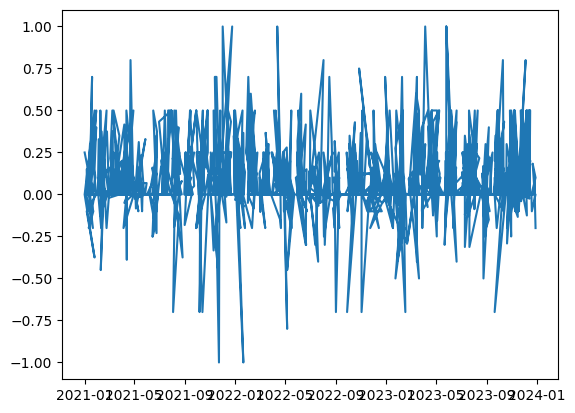

In [19]:
import matplotlib.pyplot as plt
plt.plot(merged_df['Date'],merged_df['sentiment'])

# **Observing Price Movement**

In [20]:
# Calculate stock price movement
def calculate_price_movement(row, horizon_days=1):
    pub_date = row['pub_date']
    future_date = pub_date + datetime.timedelta(days=horizon_days)
    
    future_price = stock_df[stock_df['Date'] == future_date]['Close'].values
    if len(future_price) == 0:
        return None
    
    future_price = future_price[0]
    current_price = row['Close']
    
    if future_price > current_price:
        return 'increase'
    elif future_price < current_price:
        return 'decrease'
    else:
        return 'no change'

# Apply the function to the merged DataFrame
merged_df['price_movement'] = merged_df.apply(calculate_price_movement, axis=1)
merged_df.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df.to_csv('labeled_data.csv', index=False)

In [21]:
merged_df.sample(10)

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
636,"For Reliance Jio, 5G holds key to future | Sto...",https://news.google.com/rss/articles/CBMiamh0d...,2022-05-09,reliance jio 5g holds key future stock market ...,0.000000,2022-05-09,2376.677979,2397.122559,2313.960205,2324.390137,2308.675537,9041876,decrease
1056,Reliance Polyester completes acquisition of po...,https://news.google.com/rss/articles/CBMiuwFod...,2023-03-09,reliance polyester completes acquisition polye...,0.000000,2023-03-09,2229.967285,2230.797852,2173.756592,2177.586914,2169.921875,8117564,decrease
657,6 Stocks That Lost Upto 20% In 7-Trading Days ...,https://news.google.com/rss/articles/CBMiUmh0d...,2022-05-10,6 stocks lost upto 20 7 trading days goodreturns,0.000000,2022-05-10,2302.884277,2332.051025,2268.733154,2284.101074,2268.658936,9755838,decrease
114,Sebi slaps fine of Rs 25 cr on RIL promoters f...,https://news.google.com/rss/articles/CBMiowFod...,2021-04-07,sebi slaps fine rs 25 cr ril promoters violati...,0.416667,2021-04-07,1845.999390,1889.288086,1839.815308,1848.629883,1829.752930,12133176,increase
1730,Reliance Industries Share Price Live Updates: ...,https://news.google.com/rss/articles/CBMikgFod...,2023-11-29,reliance industries share price live updates r...,0.112121,2023-11-29,2408.000000,2411.949951,2398.050049,2400.699951,2400.699951,6265653,decrease
1150,Can hydrogen bus accelerate rally in this mult...,https://news.google.com/rss/articles/CBMihwFod...,2023-04-25,hydrogen bus accelerate rally multibagger ev s...,0.000000,2023-04-25,2183.817139,2197.292969,2169.510742,2193.093262,2185.373535,4618063,decrease
1249,RIL-Jio Financial Services Demerger Highlights...,https://news.google.com/rss/articles/CBMiugFod...,2023-07-20,ril jio financial services demerger highlights...,-0.129630,2023-07-20,2580.000000,2630.949951,2580.000000,2619.850098,2610.628174,19358812,decrease
1009,"Indices end flat amidst volatility; IT, Energy...",https://news.google.com/rss/articles/CBMiigFod...,2023-01-31,indices end flat amidst volatility energy drag...,-0.062500,2023-01-31,2198.585205,2203.800293,2160.742188,2172.602783,2164.955078,11345797,decrease
639,Louis Vuitton to Gucci: Ambani betting on luxu...,https://news.google.com/rss/articles/CBMihwFod...,2022-04-26,louis vuitton gucci ambani betting luxury bran...,0.000000,2022-04-26,2501.329102,2579.784180,2499.206299,2561.924072,2544.603516,6113833,increase
1654,"Adani Enterprises, Coal India top losers on Ni...",https://news.google.com/rss/articles/CBMizwFod...,2023-11-01,adani enterprises coal india top losers nifty5...,0.055556,2023-11-01,2289.149902,2317.500000,2275.199951,2297.399902,2297.399902,5154595,increase


# **Feature Extraction**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

***i. Frequencies of words in news***

In [23]:
# Feature Extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(merged_df['cleaned_text']).toarray()

In [24]:
# Add TF-IDF features to the DataFrame
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())
merged_df = pd.concat([merged_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
merged_df

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,yet,zara,zealand,zee,zero,zerodha,zomato,zoom,zoomed,zooms
0,"Stocks To Watch: Reliance Industries, Bajaj Fi...",https://news.google.com/rss/articles/CBMiggFod...,2021-01-21,stocks watch reliance industries bajaj finance...,0.0,2021-01-21,1921.685303,1956.759277,1915.224365,1937.745483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sensex at 50000: Six stocks that have been par...,https://news.google.com/rss/articles/CBMilgFod...,2021-01-21,sensex 50000 six stocks part index dream run b...,0.0,2021-01-21,1921.685303,1956.759277,1915.224365,1937.745483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Karnataka farmers sell paddy to Reliance Retai...,https://news.google.com/rss/articles/CBMicWh0d...,2021-01-11,karnataka farmers sell paddy reliance retail m...,0.0,2021-01-11,1789.511719,1789.511719,1746.776855,1751.161133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Closing Bell: Nifty below 14,150, Sensex falls...",https://news.google.com/rss/articles/CBMi-wFod...,2021-01-06,closing bell nifty 14 150 sensex falls 263 pts...,-0.1,2021-01-06,1814.525024,1814.617310,1758.452881,1766.852173,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Delhi HC directs Future to file response to Am...,https://news.google.com/rss/articles/CBMitwFod...,2021-01-13,delhi hc directs future file response amazon p...,0.0,2021-01-13,1812.355957,1822.878174,1770.728760,1789.511719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,"Stocks to watch: Reliance Industries, Infosys,...",https://news.google.com/rss/articles/CBMie2h0d...,2023-12-26,stocks watch reliance industries infosys jk ty...,0.0,2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1348,"Stocks to watch out for today: KPIT Tech, RIL,...",https://news.google.com/rss/articles/CBMiiAFod...,2023-12-26,stocks watch today kpit tech ril tata steel bi...,0.0,2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,Stocks that will see action today: December 26...,https://news.google.com/rss/articles/CBMic2h0d...,2023-12-26,stocks see action today december 26 2023 busin...,0.1,2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1350,"Stocks in news: RIL, Tata Steel, UPL, Infosys,...",https://news.google.com/rss/articles/CBMigAFod...,2023-12-26,stocks news ril tata steel upl infosys adani w...,0.0,2023-12-26,2568.000000,2591.949951,2562.699951,2578.050049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***ii. Topic Modelling***

In [25]:
# Feature Extraction: LDA (Topic Modeling)
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features = lda_model.fit_transform(tfidf_features)

In [26]:
# Add LDA features to the DataFrame
for i in range(lda_features.shape[1]):
    merged_df[f'topic_{i}'] = lda_features[:, i]

In [27]:
# Save the final labeled and feature-enriched data
merged_df.to_csv('labeled_data_with_features.csv', index=False)
merged_df.head()

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,"Stocks To Watch: Reliance Industries, Bajaj Fi...",https://news.google.com/rss/articles/CBMiggFod...,2021-01-21,stocks watch reliance industries bajaj finance...,0.0,2021-01-21,1921.685303,1956.759277,1915.224365,1937.745483,...,0.388491,0.025131,0.025135,0.025130,0.252022,0.025141,0.183551,0.025133,0.025133,0.025132
1,Sensex at 50000: Six stocks that have been par...,https://news.google.com/rss/articles/CBMilgFod...,2021-01-21,sensex 50000 six stocks part index dream run b...,0.0,2021-01-21,1921.685303,1956.759277,1915.224365,1937.745483,...,0.029261,0.029259,0.029262,0.029259,0.029261,0.029263,0.029265,0.029262,0.193194,0.572713
2,Karnataka farmers sell paddy to Reliance Retai...,https://news.google.com/rss/articles/CBMicWh0d...,2021-01-11,karnataka farmers sell paddy reliance retail m...,0.0,2021-01-11,1789.511719,1789.511719,1746.776855,1751.161133,...,0.034301,0.691308,0.034292,0.034293,0.034297,0.034320,0.034294,0.034297,0.034299,0.034299
3,"Closing Bell: Nifty below 14,150, Sensex falls...",https://news.google.com/rss/articles/CBMi-wFod...,2021-01-06,closing bell nifty 14 150 sensex falls 263 pts...,-0.1,2021-01-06,1814.525024,1814.617310,1758.452881,1766.852173,...,0.023110,0.023110,0.023110,0.023110,0.023110,0.023110,0.023112,0.115357,0.023110,0.699761
4,Delhi HC directs Future to file response to Am...,https://news.google.com/rss/articles/CBMitwFod...,2021-01-13,delhi hc directs future file response amazon p...,0.0,2021-01-13,1812.355957,1822.878174,1770.728760,1789.511719,...,0.034397,0.034403,0.034396,0.034397,0.034402,0.034396,0.034401,0.690408,0.034404,0.034396


# **Label Encoding on price_movement feature**

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

# Load the labeled dataset with features
data = pd.read_csv('labeled_data_with_features.csv')

# Label encode the target variable
label_encoder = LabelEncoder()
data['encoded_movement'] = label_encoder.fit_transform(data['price_movement'])
data[['encoded_movement','price_movement']]

,encoded_movement,price_movement
0,0,decrease
1,0,decrease
2,1,increase
3,0,decrease
4,1,increase
...,...,...
1347,1,increase
1348,1,increase
1349,1,increase
1350,1,increase


# **Training of ML models to predict price movement**

In [29]:
from sklearn.model_selection import train_test_split
# Select relevant features and target
X = data[['sentiment'] + list(data.columns[-1:-11])]  # Sentiment and TF-IDF f eatures
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = label_encoder.inverse_transform(y_test)

# Convert categorical labels to binary labels using numpy
y_test_binary = np.where(y_test == 'increase', 1, 0)

***i. Logistic Regression***

In [30]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg = label_encoder.inverse_transform(y_pred_logreg)
y_pred_logreg = np.where(y_pred_logreg == 'increase', 1, 0)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test_binary, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.48      0.87      0.62       128
           1       0.60      0.17      0.27       143

    accuracy                           0.50       271
   macro avg       0.54      0.52      0.45       271
weighted avg       0.54      0.50      0.44       271

Accuracy: 0.5018450184501845


***ii. Support Vector Machine (SVM)***

In [31]:
# Train SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
y_pred_svm = np.where(y_pred_svm == 'increase', 1, 0)

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test_binary, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svm))


Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       128
           1       0.00      0.00      0.00       143

    accuracy                           0.47       271
   macro avg       0.24      0.50      0.32       271
weighted avg       0.22      0.47      0.30       271

Accuracy: 0.47232472324723246


c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

***iii. RandomForestClassifier***

In [32]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf = label_encoder.inverse_transform(y_pred_rf)
y_pred_rf = np.where(y_pred_rf == 'increase', 1, 0)

print("\nRandom Forest:")
print(classification_report(y_test_binary, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.49      0.86      0.62       128
           1       0.62      0.20      0.31       143

    accuracy                           0.51       271
   macro avg       0.55      0.53      0.47       271
weighted avg       0.56      0.51      0.46       271

Accuracy: 0.5129151291512916


# **Model Evaluation**

In [33]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()

In [34]:
# Evaluate Logistic Regression
evaluate_model(y_test_binary, y_pred_logreg, "Logistic Regression")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.48      0.87      0.62       128
           1       0.60      0.17      0.27       143

    accuracy                           0.50       271
   macro avg       0.54      0.52      0.45       271
weighted avg       0.54      0.50      0.44       271

Accuracy: 0.5018450184501845
Confusion Matrix:
[[111  17]
 [118  25]]



In [35]:
# Evaluate SVM
evaluate_model(y_test_binary, y_pred_svm, "Support Vector Machine (SVM)")

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       128
           1       0.00      0.00      0.00       143

    accuracy                           0.47       271
   macro avg       0.24      0.50      0.32       271
weighted avg       0.22      0.47      0.30       271

Accuracy: 0.47232472324723246
Confusion Matrix:
[[128   0]
 [143   0]]



c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [36]:
# Evaluate Random Forest
evaluate_model(y_test_binary, y_pred_rf, "Random Forest")

Model: Random Forest
              precision    recall  f1-score   support

           0       0.49      0.86      0.62       128
           1       0.62      0.20      0.31       143

    accuracy                           0.51       271
   macro avg       0.55      0.53      0.47       271
weighted avg       0.56      0.51      0.46       271

Accuracy: 0.5129151291512916
Confusion Matrix:
[[110  18]
 [114  29]]



# **ROC-AUC Curve**

In [37]:
# ROC-AUC Curve (assuming binary classification)
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

***i. Logistic Regression***

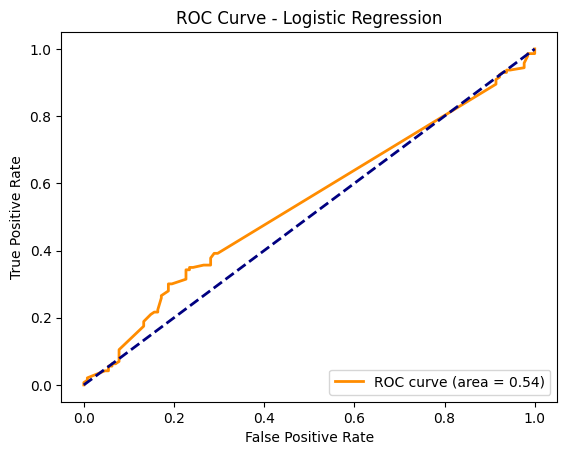

In [38]:
# Get probabilities for Logistic Regression (required for ROC curve)
y_pred_proba_logreg = logreg.predict_proba(X_test)
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test_binary, y_pred_proba_logreg, "Logistic Regression")

***ii. SVM***

In [39]:
# Get probabilities for SVM (required for ROC curve)
y_pred_proba_svm = svm.predict_proba(X_test)

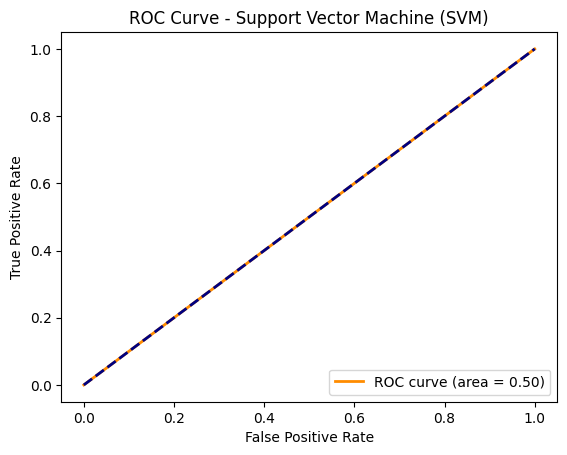

In [40]:
# Plot ROC curve for SVM
plot_roc_curve(y_test_binary, y_pred_proba_svm, "Support Vector Machine (SVM)")

***iii. Random Forest***

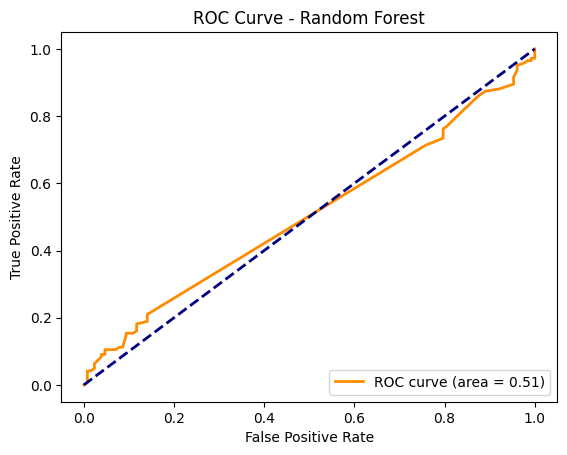

In [41]:
# Get probabilities for Random Forest (required for ROC curve)
y_pred_proba_rf = rf.predict_proba(X_test)
# Plot ROC curve for Random Forest
plot_roc_curve(y_test_binary, y_pred_proba_rf, "Random Forest")

# **Prection of price movement using Neural Networks**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Select relevant features and target
X_text = data['cleaned_text']  # Cleaned text features
X_numeric = data.drop(['price_movement', 'cleaned_text'], axis=1)  # Numeric features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()


In [43]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Define neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Train the model
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Accuracy:", accuracy_score(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5047 - loss: 0.6942 - val_accuracy: 0.5092 - val_loss: 0.6936
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5665 - loss: 0.6863 - val_accuracy: 0.4649 - val_loss: 0.6943
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6237 - loss: 0.6684 - val_accuracy: 0.5277 - val_loss: 0.6899
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7635 - loss: 0.6191 - val_accuracy: 0.5535 - val_loss: 0.6926
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8398 - loss: 0.4953 - val_accuracy: 0.5387 - val_loss: 0.7543
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.3735 - val_accuracy: 0.5498 - val_loss: 0.8239
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.2685 - val_accuracy: 0.5166 - val_loss: 0.9534
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9296 - loss: 0.2040 - val_accuracy: 0.5277 - val_loss:

***Neural Network Model Accuracy and Loss Curves***

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9775 - loss: 0.0894 - val_accuracy: 0.5387 - val_loss: 1.3148
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9814 - loss: 0.0697 - val_accuracy: 0.5092 - val_loss: 1.4183
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0496 - val_accuracy: 0.5351 - val_loss: 1.4841
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0459 - val_accuracy: 0.5351 - val_loss: 1.5812
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0386 - val_accuracy: 0.5129 - val_loss: 1.6962
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0344 - val_accuracy: 0.5498 - val_loss: 1.7468
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.5277 - val_loss: 1.7595
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9944 - loss: 0.0248 - val_accuracy: 0.5387 - val_loss:

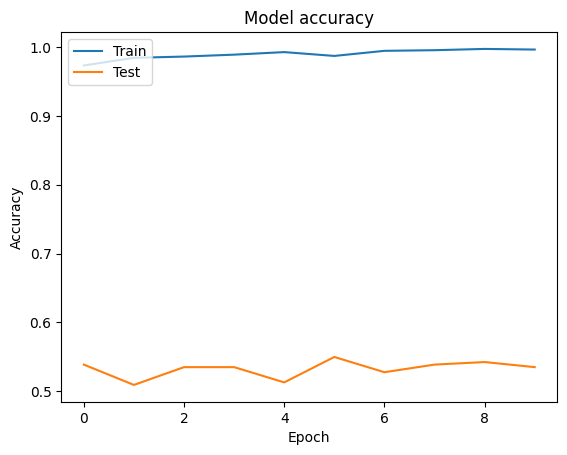

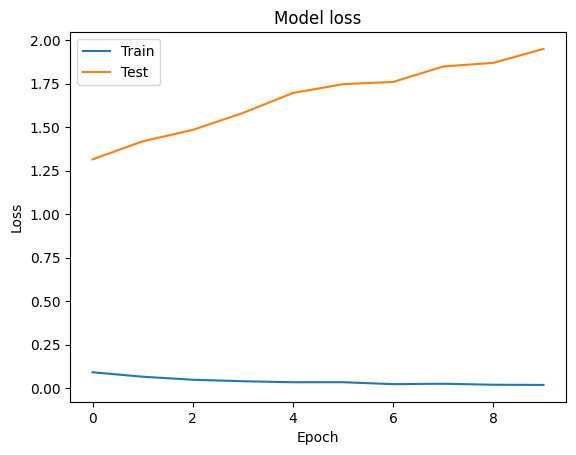

In [45]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot the training history
plot_history(history)


# **Finding Buying and Selling Points of Reliance Stocks and total return on the basis of sentiment we calculated**

In [47]:
def aggregate_sentiment_scores(headlines_df):
    sentiment_summary = headlines_df.groupby('Date')['sentiment'].mean()
    return sentiment_summary

def generate_trading_signals(sentiment_summary):
    signals = sentiment_summary.apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
    return signals

In [48]:
def calculate_portfolio_metrics(portfolio):
    total_trades = len(portfolio) // 2
    wins = portfolio[portfolio['type'] == 'sell']['profit'] > 0
    win_percentage = wins.mean() * 100
    total_profit = portfolio[portfolio['type'] == 'sell']['profit'].sum()
    
    return total_trades, win_percentage, total_profit

def calculate_sharpe_ratio(portfolio, risk_free_rate=0.01):
    daily_returns = portfolio[portfolio['type'] == 'sell']['profit']
    excess_returns = daily_returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

def calculate_max_drawdown(portfolio):
    portfolio['cumulative_profit'] = portfolio['profit'].cumsum()
    cumulative_max = portfolio['cumulative_profit'].cummax()
    drawdown = portfolio['cumulative_profit'] - cumulative_max
    max_drawdown = drawdown.min()
    return max_drawdown

In [50]:
import plotly.graph_objects as go

def plot_signals(stock_data, portfolio):
    start_date = portfolio['date'].min()
    end_date = portfolio['date'].max()

    # Filter stock data to the date range available in the portfolio
    stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
    
    buy_signals = portfolio[portfolio['type'] == 'buy']
    sell_signals = portfolio[portfolio['type'] == 'sell']
    fig = go.Figure()
    # Add stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'], 
        y=stock_data['Close'],
        mode='lines',
        name='Stock Price',
        line=dict(color='blue')
    ))

    # Add buy signals
    fig.add_trace(go.Scatter(
        x=buy_signals['date'], 
        y=buy_signals['price'],
        mode='markers',
        name='Buy Signal',
        marker=dict(symbol='triangle-up', color='green', size=10)
    ))

    # Add sell signals
    fig.add_trace(go.Scatter(
        x=sell_signals['date'], 
        y=sell_signals['price'],
        mode='markers',
        name='Sell Signal',
        marker=dict(symbol='triangle-down', color='red', size=10)
    ))
    # Update layout for better presentation
    fig.update_layout(
        title=f'Stock Price with Buy and Sell Signals for Reliance Industries',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        hovermode='x'
    )
    fig.show()

In [51]:
def simulate_trades(stock_data, trading_signals,capital):
    data = pd.read_csv('merged_data.csv')
    date = data['Date']
    portfolio = []
    position = 0
    buy_price = 0
    quantity =0
    for index, price in (stock_data['Close'].items()):
        if date[index] in trading_signals.index:
            signal = trading_signals.loc[date[index]]
            if signal == 1 and position == 0:  # Buy signal
                position = 1
                buy_price = price
                quantity = capital/price
                capital = capital%price
                portfolio.append({'date': date[index], 'type': "buy", 'price': buy_price, 'capital':capital})
            elif signal == -1 and position == 1 and (price>buy_price) :  # Sell signal
                position = 0
                sell_price = price
                profit = (sell_price - buy_price)*quantity
                capital = capital+ quantity*sell_price
                portfolio.append({'date': date[index], 'type': "sell", 'price': sell_price,'capital':capital, 'profit': profit})

    return pd.DataFrame(portfolio)


In [52]:
def final(rate, intial):

    # Fetch news data
    news_data = pd.read_csv('merged_data.csv')
    # Calculate sentiment scores
    news_data_with_scores = news_data[['Date','sentiment']]
    # Aggregate sentiment scores by date
    sentiment_summary = aggregate_sentiment_scores(news_data_with_scores)
    # Generate trading signals
    trading_signals = generate_trading_signals(sentiment_summary)
    # Simulate trades
    print("\nSimulating trades...")
    portfolio = simulate_trades(news_data, trading_signals, intial)
    # Calculate portfolio metrics
    total_trades, win_percentage, total_profit = calculate_portfolio_metrics(portfolio)
    # Print the portfolio
    print(portfolio)
    print(f"\nInitial capital: ${intial}")
    print(f"Total Trades: {total_trades}")
    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Total Portfolio Returns: ${total_profit:.2f}")
    print(f"Sharpe ratio:{calculate_sharpe_ratio(portfolio, rate):.2f} with risk free rate of {rate}")
    print(f"Max drawdown: {calculate_max_drawdown(portfolio)}")
    # Plot buy and sell signals
    plot_signals(news_data, portfolio)

In [54]:
final(0.03, 10000)


Simulating trades...
         date  type        price       capital       profit
0  2021-01-14   buy  1809.633179    951.834106          NaN
1  2021-06-15  sell  2076.749268  12427.912751  1476.078644
2  2021-07-14   buy  1925.377319    875.648834          NaN
3  2021-08-26  sell  2058.704590  14164.161566   860.599981
4  2021-07-30   buy  1878.581299   1014.092475          NaN
5  2021-08-03  sell  1926.992554  15543.266104   365.012063
6  2021-08-13   buy  1980.434204   1680.226675          NaN
7  2021-10-06  sell  2362.740723  20223.992336  3000.499557
8  2021-10-22   buy  2425.089355    823.277492          NaN

Initial capital: $10000
Total Trades: 4
Win Percentage: 100.00%
Total Portfolio Returns: $5702.19
Sharpe ratio:1.25 with risk free rate of 0.03
Max drawdown: 0.0
